In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import random

# ANN

In [23]:
df=pd.read_csv("cancer_classification.csv")

In [24]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

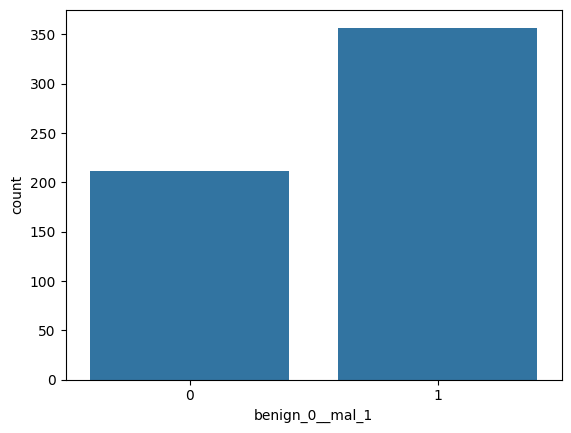

In [26]:
sns.countplot(x="benign_0__mal_1", data=df)

In [27]:
X = df.drop('benign_0__mal_1',axis=1)
y= df['benign_0__mal_1']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [29]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [30]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
model=Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
model.fit(x=X_train, y=y_train, epochs=150, validation_data=(X_test, y_test),verbose=1)

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6837 - val_loss: 0.6753
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6489 - val_loss: 0.6507
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6195 - val_loss: 0.6259
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5848 - val_loss: 0.5931
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5348 - val_loss: 0.5640
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5263 - val_loss: 0.5354
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4572 - val_loss: 0.5073
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4488 - val_loss: 0.4764
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4089 - val_loss: 0.4457
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3495 - val_loss: 0.4166
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3572 - val_loss: 0.3785
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

<Axes: >

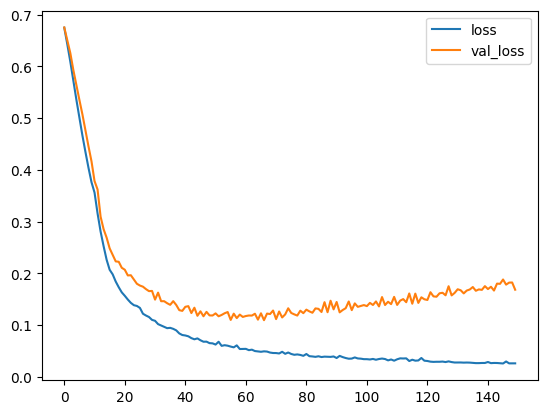

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# CNN

In [37]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [40]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

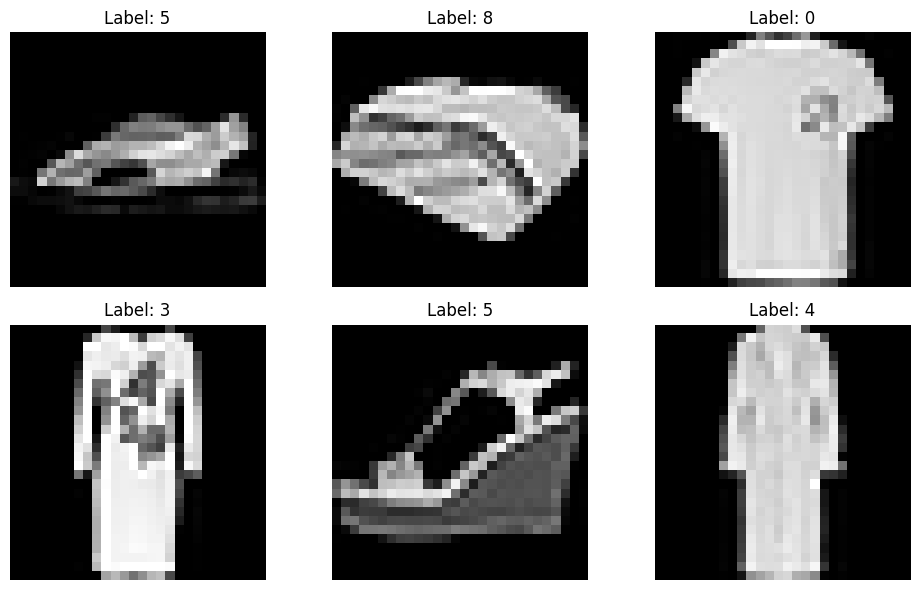

In [45]:
# Select 6 random indices
random_indices = random.sample(range(len(x_train)), 6)

# Create a figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# Iterate through the selected indices and display the images
for i, index in enumerate(random_indices):
    ax = axes[i // 3, i % 3]
    ax.imshow(x_train[index], cmap='gray')
    ax.set_title(f"Label: {y_train[index]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [47]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [49]:
x_train=x_train/255
x_test=x_test/255

In [50]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [63]:
model2=Sequential()
model2.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
early=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [66]:
model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.5385 - loss: 1.2974 - val_accuracy: 0.6699 - val_loss: 85.8566
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.7591 - loss: 0.6340 - val_accuracy: 0.7256 - val_loss: 71.5104
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7871 - loss: 0.5642 - val_accuracy: 0.7382 - val_loss: 69.6133
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8063 - loss: 0.5215 - val_accuracy: 0.7396 - val_loss: 69.4914
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8164 - loss: 0.4955 - val_accuracy: 0.7690 - val_loss: 60.8880
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8287 - loss: 0.4766 - val_accuracy: 0.7659 - val_loss: 68.4140
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8330 - loss: 0.4613 - val_accuracy: 0.7617 - val_loss: 62.8754
Epoch 7: early stopping


<Axes: >

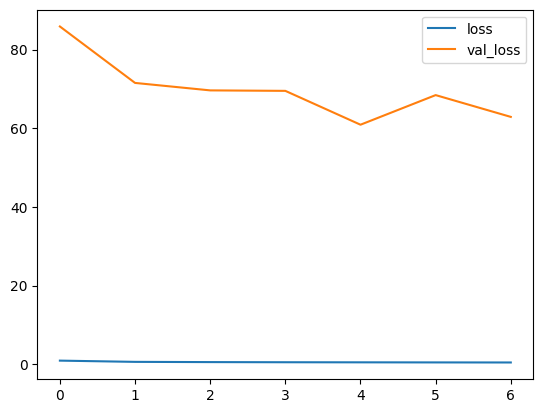

In [67]:
losses=pd.DataFrame(model2.history.history)
losses[['loss','val_loss']].plot()

In [68]:
y_pred=model2.predict(x_test)
y_pred=y_pred.argmax(axis=-1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([5, 2, 1, ..., 8, 1, 5])

In [71]:
cm=confusion_matrix(y_test.argmax(axis=-1),y_pred)
cm

array([[782,  28,  31,  29,  28,   0,  78,   0,  24,   0],
       [  3, 952,   3,  25,  10,   0,   3,   0,   4,   0],
       [ 10,   5, 547,   8, 398,   1,  17,   0,  14,   0],
       [ 20,  35,  15, 730, 169,   1,  24,   0,   6,   0],
       [  0,   1,  32,   4, 949,   0,  10,   0,   4,   0],
       [  1,   0,   0,   0,   0, 923,   0,  27,   5,  44],
       [170,  12,  84,  19, 508,   0, 173,   0,  34,   0],
       [  0,   0,   0,   0,   0, 163,   0, 740,   0,  97],
       [  1,   0,  12,   5,  24,   5,   6,   2, 943,   2],
       [  0,   0,   0,   0,   0, 109,   0,  12,   1, 878]])

In [75]:
print(classification_report(y_test.argmax(axis=-1),y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1000
           1       0.92      0.95      0.94      1000
           2       0.76      0.55      0.63      1000
           3       0.89      0.73      0.80      1000
           4       0.45      0.95      0.62      1000
           5       0.77      0.92      0.84      1000
           6       0.56      0.17      0.26      1000
           7       0.95      0.74      0.83      1000
           8       0.91      0.94      0.93      1000
           9       0.86      0.88      0.87      1000

    accuracy                           0.76     10000
   macro avg       0.79      0.76      0.75     10000
weighted avg       0.79      0.76      0.75     10000



<Axes: >

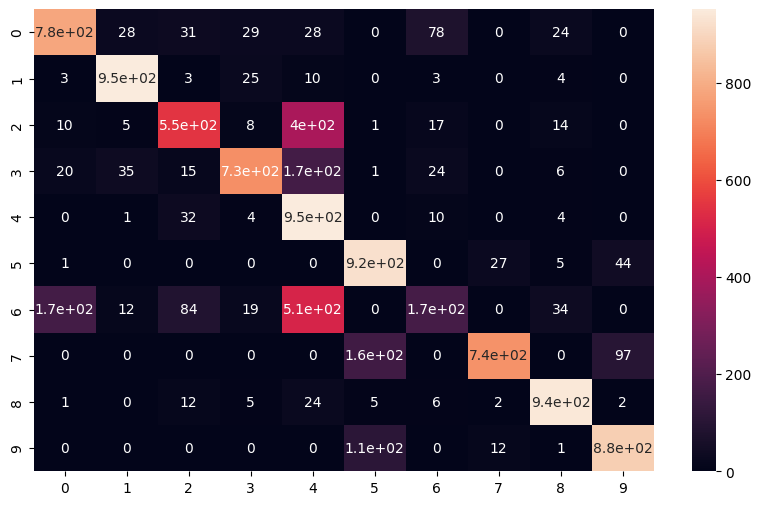

In [76]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)

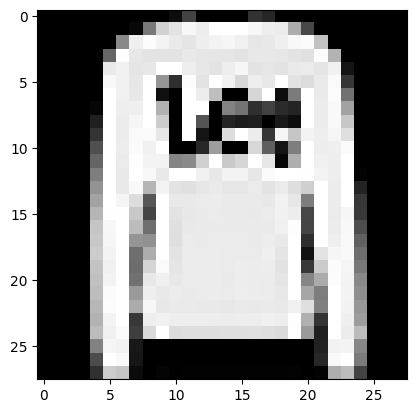

In [83]:
plt.imshow(x_test[1], cmap='gray')

In [86]:
new_pred=model2.predict(x_test[1].reshape(1,28,28,1)).argmax()
new_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


2